# Alejandro Garcia Flores - 201326489

## Quiz 3 - Ciencia de Datos

## 0. Datos

In [1]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (22.0 MB)


In [2]:
#Manejo de datos
import pandas as pd
import numpy as np

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Analisis profundo de datos
from pandas_profiling import ProfileReport

#Entrenamiento del modelo
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.model_selection import GridSearchCV

#Librerías extras
import itertools

In [3]:
url = "/content/drive/MyDrive/Colab Notebooks/insurance.csv"
df = pd.read_csv(url)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
#ProfileReport(df)

In [5]:
df = df.drop_duplicates()

In [6]:
y = pd.get_dummies(df.sex, prefix='sex')
z = pd.get_dummies(df.region, prefix='region')
f = pd.get_dummies(df.smoker, prefix='smoker')
print(y.head())

   sex_female  sex_male
0           1         0
1           0         1
2           0         1
3           0         1
4           0         1


In [7]:
df =  df.join(y).drop(columns=['sex'])
df =  df.join(z).drop(columns=['region'])
df =  df.join(f).drop(columns=['smoker'])
df

,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,1,0,0,0,0,1,0,1
1,18,33.770,1,1725.55230,0,1,0,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,0,1,0,1,0
3,33,22.705,0,21984.47061,0,1,0,1,0,0,1,0
4,32,28.880,0,3866.85520,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,0,1,0,0,1,0
1334,18,31.920,0,2205.98080,1,0,1,0,0,0,1,0
1335,18,36.850,0,1629.83350,1,0,0,0,1,0,1,0
1336,21,25.800,0,2007.94500,1,0,0,0,0,1,1,0


In [8]:
train, test = train_test_split(df, test_size=0.2, random_state=33)
train.head()

,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
733,48,27.265,1,9447.25035,1,0,1,0,0,0,1,0
594,41,40.260,0,5709.16440,0,1,0,0,1,0,1,0
101,30,25.460,0,3645.08940,0,1,1,0,0,0,1,0
96,54,30.800,3,12105.32000,1,0,0,0,0,1,1,0
486,54,21.470,3,12475.35130,1,0,0,1,0,0,1,0


In [9]:
X_train, y_train = train.drop(['charges'],axis=1), train['charges'] 
display(X_train)
y_train

,age,bmi,children,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
733,48,27.265,1,1,0,1,0,0,0,1,0
594,41,40.260,0,0,1,0,0,1,0,1,0
101,30,25.460,0,0,1,1,0,0,0,1,0
96,54,30.800,3,1,0,0,0,0,1,1,0
486,54,21.470,3,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1226,38,16.815,2,0,1,1,0,0,0,1,0
659,57,28.785,4,1,0,1,0,0,0,1,0
578,52,30.200,1,0,1,0,0,0,1,1,0
391,19,37.430,0,1,0,0,1,0,0,1,0


733      9447.25035
594      5709.16440
101      3645.08940
96      12105.32000
486     12475.35130
           ...     
1226     6640.54485
659     14394.39815
578      9724.53000
391      2138.07070
1045    21880.82000
Name: charges, Length: 1069, dtype: float64

In [10]:
columns = X_train.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=columns)
X_train

,age,bmi,children,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,0.617042,-0.578862,-0.063905,1.014132,-1.014132,1.763955,-0.571229,-0.614473,-0.556820,0.503214,-0.503214
1,0.117223,1.549103,-0.907297,-0.986065,0.986065,-0.566908,-0.571229,1.627410,-0.556820,0.503214,-0.503214
2,-0.668207,-0.874436,-0.907297,-0.986065,0.986065,1.763955,-0.571229,-0.614473,-0.556820,0.503214,-0.503214
3,1.045459,0.000003,1.622878,1.014132,-1.014132,-0.566908,-0.571229,-0.614473,1.795911,0.503214,-0.503214
4,1.045459,-1.527809,1.622878,1.014132,-1.014132,-0.566908,1.750611,-0.614473,-0.556820,0.503214,-0.503214
...,...,...,...,...,...,...,...,...,...,...,...
1064,-0.096985,-2.290077,0.779486,-0.986065,0.986065,1.763955,-0.571229,-0.614473,-0.556820,0.503214,-0.503214
1065,1.259667,-0.329958,2.466269,1.014132,-1.014132,1.763955,-0.571229,-0.614473,-0.556820,0.503214,-0.503214
1066,0.902653,-0.098248,-0.063905,-0.986065,0.986065,-0.566908,-0.571229,-0.614473,1.795911,0.503214,-0.503214
1067,-1.453636,1.085683,-0.907297,1.014132,-1.014132,-0.566908,1.750611,-0.614473,-0.556820,0.503214,-0.503214


In [11]:
X_test, y_test = test.drop(['charges'],axis=1), test['charges'] 
display(X_test)
y_test

,age,bmi,children,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
20,60,36.005,0,1,0,1,0,0,0,1,0
583,32,23.650,1,1,0,0,0,1,0,1,0
1208,37,25.555,1,1,0,1,0,0,0,0,1
183,44,26.410,0,1,0,0,1,0,0,1,0
32,19,28.600,5,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
196,39,32.800,0,1,0,0,0,0,1,1,0
949,25,29.700,3,0,1,0,0,0,1,0,1
779,53,28.880,0,0,1,0,1,0,0,1,0
437,35,28.900,3,0,1,0,0,0,1,1,0


20      13228.84695
583     17626.23951
1208    20296.86345
183      7419.47790
32       4687.79700
           ...     
196      5649.71500
949     19933.45800
779      9869.81020
437      5926.84600
300      6746.74250
Name: charges, Length: 268, dtype: float64

In [12]:
columns = X_test.columns
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test,columns=columns)
X_test

,age,bmi,children,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,1.505616,0.975632,-0.920710,0.992565,-0.992565,1.785357,-0.54285,-0.600338,-0.606092,0.525538,-0.525538
1,-0.471658,-1.072219,-0.137376,0.992565,-0.992565,-0.560112,-0.54285,1.665727,-0.606092,0.525538,-0.525538
2,-0.118573,-0.756464,-0.137376,0.992565,-0.992565,1.785357,-0.54285,-0.600338,-0.606092,-1.902811,1.902811
3,0.375745,-0.614747,-0.920710,0.992565,-0.992565,-0.560112,1.84213,-0.600338,-0.606092,0.525538,-0.525538
4,-1.389678,-0.251753,2.995962,0.992565,-0.992565,-0.560112,-0.54285,-0.600338,1.649916,0.525538,-0.525538
...,...,...,...,...,...,...,...,...,...,...,...
263,0.022661,0.444401,-0.920710,0.992565,-0.992565,-0.560112,-0.54285,-0.600338,1.649916,0.525538,-0.525538
264,-0.965976,-0.069427,1.429293,-1.007491,1.007491,-0.560112,-0.54285,-0.600338,1.649916,-1.902811,1.902811
265,1.011298,-0.205342,-0.920710,-1.007491,1.007491,-0.560112,1.84213,-0.600338,-0.606092,0.525538,-0.525538
266,-0.259807,-0.202027,1.429293,-1.007491,1.007491,-0.560112,-0.54285,-0.600338,1.649916,0.525538,-0.525538


## 1. Entrene un primer modelo de regresión lineal sin aplicar ningún tipo de regularización.

In [13]:
LinearModel = LinearRegression()
LinearModel.fit(X_train, y_train)
print('Coefficients: ', LinearModel.coef_)
print('Intercept: ',LinearModel.intercept_)

Coefficients:  [ 3581.28692823  2079.56639218   601.20430594    75.68316648
   -75.68316648   345.64468278   102.89459943  -311.47552891
  -126.2749617  -4870.44022501  4870.44022501]
Intercept:  13279.483892684751


In [14]:
coef = dict(zip(X_train.columns, LinearModel.coef_))
coef

{'age': 3581.286928225415,
 'bmi': 2079.5663921806854,
 'children': 601.2043059387911,
 'sex_female': 75.68316647596049,
 'sex_male': -75.6831664759606,
 'region_northeast': 345.6446827792721,
 'region_northwest': 102.89459943279829,
 'region_southeast': -311.47552891197824,
 'region_southwest': -126.27496169828476,
 'smoker_no': -4870.44022501178,
 'smoker_yes': 4870.440225011779}

In [15]:
y_pred = LinearModel.predict(X_train)
y_pred

array([10311.47993504, 10632.97399108,  4284.15732065, ...,
       10928.29886128,  5283.52138695, 32358.83732461])

In [16]:
n,p = X_train.shape

print('------------ Regresión Lineal ------------')
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_train,y_pred))
print("R2-score: %.5f" % r2_score(y_train, y_pred) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_train, y_pred))*(n-1)/(n-p-1)) )

------------ Regresión Lineal ------------
Residual sum of squares (MSE): 36688916.75
R2-score: 0.75351
Adj R2-score: 0.75095


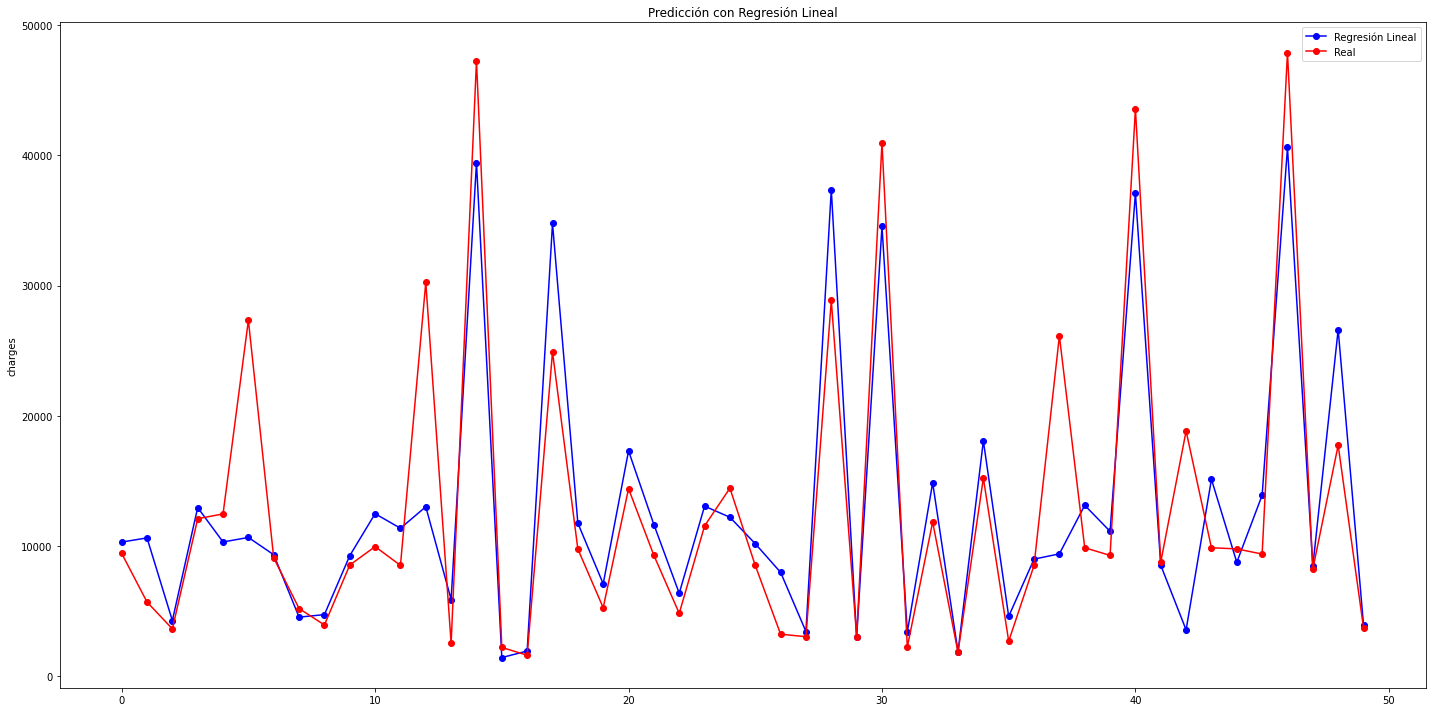

In [17]:
fig, axs = plt.subplots(1,figsize=(20,10))

xvals = list(range(len(y_train[:50])))
axs.plot(xvals, y_pred[:50],'bo-', label='Regresión Lineal')
axs.plot(xvals, y_train[:50],'ro-', label='Real')

axs.set(title='Predicción con Regresión Lineal',ylabel=y_train.name)
axs.legend()

plt.tight_layout()
plt.show()

## 1.1 Evaluacion del modelo

In [18]:
y_pred = LinearModel.predict(X_test)

In [19]:
n,p = X_test.shape

print('------------ Regresión Lineal ------------')
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_test,y_pred))
print("R2-score: %.5f" % r2_score(y_test, y_pred) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_test, y_pred))*(n-1)/(n-p-1)) )

------------ Regresión Lineal ------------
Residual sum of squares (MSE): 35877645.26
R2-score: 0.73886
Adj R2-score: 0.72764


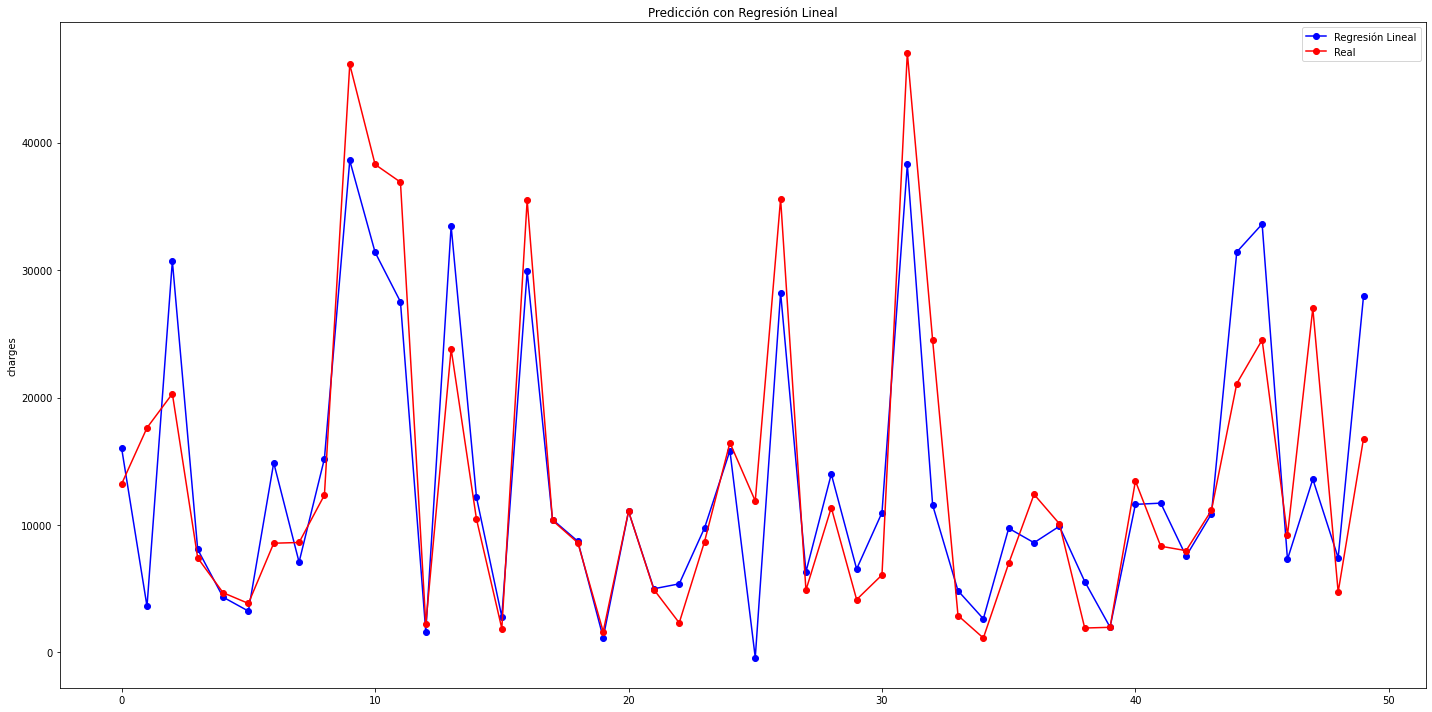

In [20]:
fig, axs = plt.subplots(1,figsize=(20,10))

xvals = list(range(len(y_test[:50])))
axs.plot(xvals, y_pred[:50],'bo-', label='Regresión Lineal')
axs.plot(xvals, y_test[:50],'ro-', label='Real')

axs.set(title='Predicción con Regresión Lineal',ylabel=y_test.name)
axs.legend()

plt.tight_layout()
plt.show()

### Conclusión parte 1:

* i. ¿Es aceptable el error obtenido?
En el set de entrenamiento obtuvo un R2 de 0.75 y en el set de test un R2 de 0.73, ambos son buenos resultados para una regresion lineal simple.
* ii. ¿Hay evidencia de overfitting?
No, los datos tienen un r2 similar que no es exageramente alto tanto en el data set de entrenamiento como en el de test, lo que significa que no hay overfitting.


## Regularización Ridge o Lasso

* Aplique una transformación polinomial a los datos de entrada y regularización Ridge o Lasso al modelo de
regresión. Pruebe con al menos 2 grados diferentes del polinomio y con al menos 3 valores de alpha para la
regularización. Evalúe dichos modelos y concluya:
* i. ¿Fue posible mejorar el error? ¿Qué hiper-parámetros tiene el modelo que produce el menor error?
* ii. ¿Qué atributos parecen ser los más importantes para realizar la predicción?


In [21]:
class ToPolynomial(BaseEstimator,TransformerMixin):
    def __init__(self,k=2):
        self.k = k

    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        columns = X.columns
        X_train_pol = pd.concat([X**(i+1) for i in range(self.k)],axis=1) #Polinomios sin interacciones
        X_train_pol.columns = np.reshape([[i+' '+str(j+1) for i in columns] for j in range(self.k)],-1)
        temp = pd.concat([X[i[0]]*X[i[1]] for i in list(itertools.combinations(columns, 2))],axis=1) #Combinaciones sólo de grado 1
        temp.columns = [' '.join(i) for i in list(itertools.combinations(columns, 2))]
        X_train_pol = pd.concat([X_train_pol,temp],axis=1)
        return X_train_pol

In [22]:
estimators = [
        ('polinomial',ToPolynomial()),
        ('regresion', Lasso())          
    ]

pipe = Pipeline(estimators)

parameters = {
              'polinomial__k':[2,3,4,5,'passthrough'],
              'regresion__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
              }

grid_search = GridSearchCV(pipe, parameters, verbose=2, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [23]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", lin

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polinomial', ToPolynomial()),
                                       ('regresion', Lasso())]),
             n_jobs=-1,
             param_grid={'polinomial__k': [2, 3, 4, 5, 'passthrough'],
                         'regresion__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [24]:
best_model = grid_search.best_estimator_

pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_polinomial__k,param_regresion__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.174652,0.062971,0.050504,0.029873,2,0.001,"{'polinomial__k': 2, 'regresion__alpha': 0.001}",-2.639945e+07,-2.616307e+07,-1.958021e+07,-2.831615e+07,-2.392400e+07,-2.487658e+07,2.992115e+06,20
1,0.146624,0.038045,0.046018,0.016515,2,0.01,"{'polinomial__k': 2, 'regresion__alpha': 0.01}",-2.640006e+07,-2.616267e+07,-1.958005e+07,-2.831570e+07,-2.392405e+07,-2.487651e+07,2.992095e+06,19
2,0.166975,0.041327,0.035690,0.016037,2,0.1,"{'polinomial__k': 2, 'regresion__alpha': 0.1}",-2.640012e+07,-2.616231e+07,-1.957942e+07,-2.831388e+07,-2.392262e+07,-2.487567e+07,2.991967e+06,18
3,0.173224,0.026196,0.058573,0.011084,2,1,"{'polinomial__k': 2, 'regresion__alpha': 1}",-2.640449e+07,-2.615457e+07,-1.957149e+07,-2.829406e+07,-2.390929e+07,-2.486678e+07,2.990856e+06,17
4,0.147730,0.016151,0.050340,0.014277,2,10,"{'polinomial__k': 2, 'regresion__alpha': 10}",-2.645043e+07,-2.610348e+07,-1.949597e+07,-2.810411e+07,-2.377790e+07,-2.478638e+07,2.983842e+06,15
5,0.054806,0.019240,0.039117,0.014670,2,100,"{'polinomial__k': 2, 'regresion__alpha': 100}",-2.685703e+07,-2.592272e+07,-1.906327e+07,-2.681090e+07,-2.285316e+07,-2.430142e+07,2.999764e+06,3
6,0.214700,0.047564,0.052168,0.013941,3,0.001,"{'polinomial__k': 3, 'regresion__alpha': 0.001}",-2.678861e+07,-2.590549e+07,-1.915235e+07,-2.831992e+07,-2.302332e+07,-2.463794e+07,3.239994e+06,10
7,0.195620,0.037629,0.047359,0.018456,3,0.01,"{'polinomial__k': 3, 'regresion__alpha': 0.01}",-2.678862e+07,-2.590548e+07,-1.915220e+07,-2.831977e+07,-2.302324e+07,-2.463786e+07,3.240015e+06,9
8,0.208068,0.031272,0.057054,0.004568,3,0.1,"{'polinomial__k': 3, 'regresion__alpha': 0.1}",-2.678917e+07,-2.590448e+07,-1.915104e+07,-2.831845e+07,-2.302215e+07,-2.463706e+07,3.240213e+06,8
9,0.220113,0.039470,0.057802,0.026834,3,1,"{'polinomial__k': 3, 'regresion__alpha': 1}",-2.679148e+07,-2.590077e+07,-1.914013e+07,-2.830221e+07,-2.301658e+07,-2.463024e+07,3.240794e+06,7


In [25]:
grid_search.best_params_

{'polinomial__k': 3, 'regresion__alpha': 100}

In [26]:
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

n,p = X_train.shape

print('------------ Regresión Lasso con entrenamiento------------')
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_train,y_pred_train))
print("R2-score: %.5f" % r2_score(y_train, y_pred_train) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_train, y_pred_train))*(n-1)/(n-p-1)) )

n,p = X_test.shape

print('------------ Regresión Lasso con evaluación ------------')
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_test,y_pred_test))
print("R2-score: %.5f" % r2_score(y_test, y_pred_test) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_test, y_pred_test))*(n-1)/(n-p-1)) )

------------ Regresión Lasso con entrenamiento------------
Residual sum of squares (MSE): 22810240.75
R2-score: 0.84675
Adj R2-score: 0.84516
------------ Regresión Lasso con evaluación ------------
Residual sum of squares (MSE): 21411762.65
R2-score: 0.84415
Adj R2-score: 0.83746


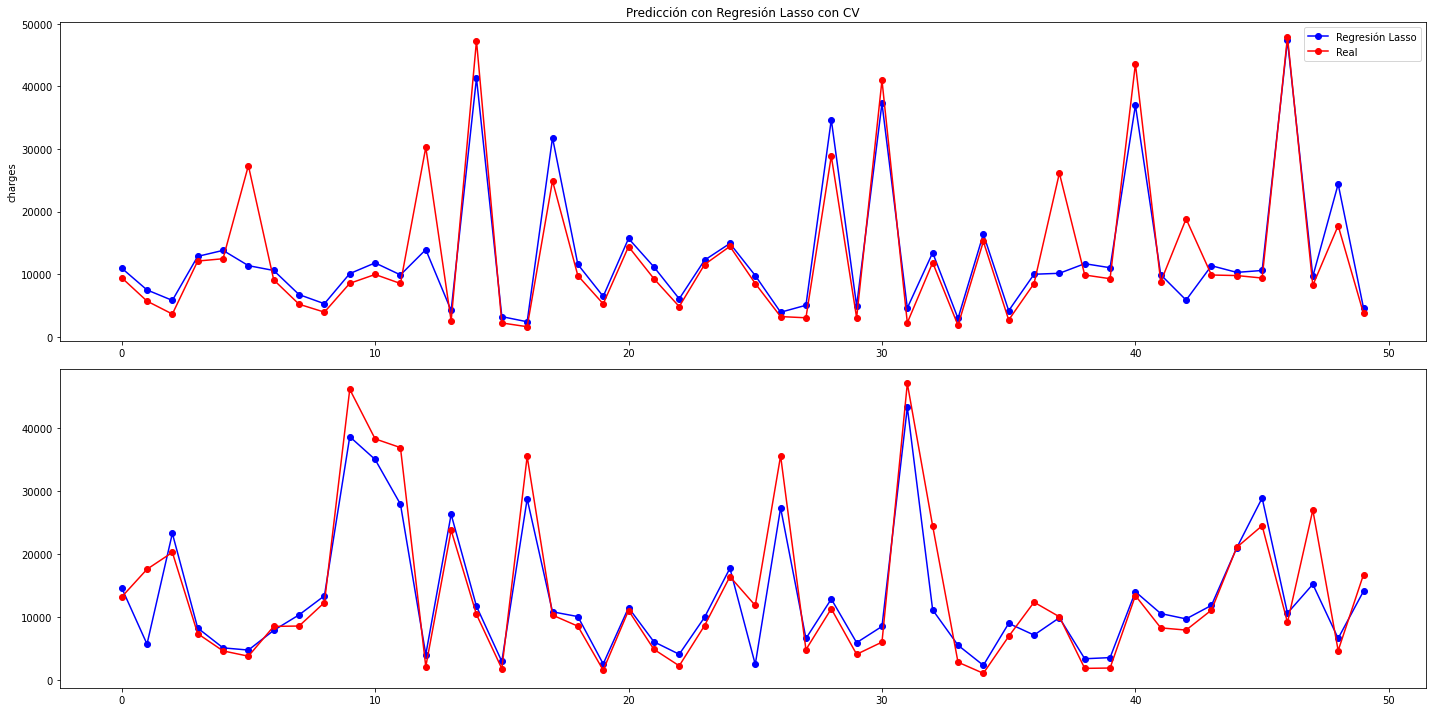

In [29]:
%matplotlib inline
fig, axs = plt.subplots(2,figsize=(20,10))

xvals = list(range(len(y_test[:50])))
axs[0].plot(xvals, y_pred_train[:50],'bo-', label='Regresión Lasso')
axs[0].plot(xvals, y_train[:50],'ro-', label='Real')

axs[1].plot(xvals, y_pred_test[:50],'bo-', label='Regresión Lasso')
axs[1].plot(xvals, y_test[:50],'ro-', label='Real')

axs[0].set(title='Predicción con Regresión Lasso con CV',ylabel=y_train.name)
axs[0].legend()

plt.tight_layout()
plt.show()

In [32]:
lasso_model = best_model['regresion']
fake_df = best_model['polinomial'].transform(X_test)
print(f'Intercepto: {lasso_model.intercept_}')
coef = list(zip(['Intercepto'] + list(fake_df.columns), [lasso_model.intercept_] + list(lasso_model.coef_)))
coef = pd.DataFrame(coef,columns=['Variable','Parámetro'])
coef.sort_values('Parámetro')
coef.head(10)

Intercepto: 8228.330209125723


,Variable,Parámetro
0,Intercepto,8228.330209
1,age 1,3471.455956
2,bmi 1,2250.924479
3,children 1,662.954152
4,sex_female 1,227.274448
5,sex_male 1,-0.000000
6,region_northeast 1,0.000000
7,region_northwest 1,0.000000
8,region_southeast 1,-0.000000
9,region_southwest 1,-0.000000


In [31]:
coef[coef['Parámetro'].between(-1,1)]

,Variable,Parámetro
5,sex_male 1,-0.000000e+00
6,region_northeast 1,0.000000e+00
7,region_northwest 1,0.000000e+00
8,region_southeast 1,-0.000000e+00
9,region_southwest 1,-0.000000e+00
...,...,...
82,region_northwest smoker_yes,0.000000e+00
83,region_southeast region_southwest,0.000000e+00
85,region_southeast smoker_yes,-8.480357e-12
87,region_southwest smoker_yes,4.449486e-12


* i. ¿Fue posible mejorar el error? ¿Qué hiper-parámetros tiene el modelo que produce el menor error?
* ii. ¿Qué atributos parecen ser los más importantes para realizar la predicción?

los atributos mas importantes en orden son:
1. la edad
2. el bmi
3. si tienen hijos
4. si es mujer o no
* Todos los atributos son no polinomiales en el modelo mas optimo, con un alfa de 100 en lasso. los atributos mas optimos fueron: {'polinomial__k': 3, 'regresion__alpha': 100}